In [4]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [5]:
#Loading the Data

df = pd.read_csv('brfss_2022_final.csv')

# Display the first few rows of the DataFrame
print(df.head())

   DRNK3GE5  SLEPTIM1  EMTSUPRT  INCOME3  SEXVAR
0       NaN       8.0       1.0     99.0       2
1       NaN       6.0       1.0      5.0       2
2       NaN       5.0       2.0     10.0       2
3       NaN       7.0       1.0     77.0       2
4      88.0       9.0       1.0      5.0       2


In [ ]:
# Understanding structure of the Data

In [8]:
#Shape of the data to tell us # of rows and columns

print(df.shape) 

(445132, 5)


In [10]:
#Display column data types

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DRNK3GE5  209849 non-null  float64
 1   SLEPTIM1  445129 non-null  float64
 2   EMTSUPRT  254141 non-null  float64
 3   INCOME3   432200 non-null  float64
 4   SEXVAR    445132 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 17.0 MB
None


In [12]:
#Summarize numerical columns
print(df.describe())

            DRNK3GE5       SLEPTIM1       EMTSUPRT        INCOME3  \
count  209849.000000  445129.000000  254141.000000  432200.000000   
mean       65.323223       7.912277       1.958027      22.723947   
std        37.089638       8.164575       1.280953      32.977432   
min         1.000000       1.000000       1.000000       1.000000   
25%        15.000000       6.000000       1.000000       6.000000   
50%        88.000000       7.000000       2.000000       8.000000   
75%        88.000000       8.000000       2.000000      10.000000   
max        99.000000      99.000000       9.000000      99.000000   

              SEXVAR  
count  445132.000000  
mean        1.529939  
std         0.499103  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         2.000000  


In [ ]:
# Identifying missing data

In [14]:
#Visualize missing data

print(df.isna().sum())

DRNK3GE5    235283
SLEPTIM1         3
EMTSUPRT    190991
INCOME3      12932
SEXVAR           0
dtype: int64


In [16]:
# Check for missing values

missing_data = df.isnull()
print(missing_data)

        DRNK3GE5  SLEPTIM1  EMTSUPRT  INCOME3  SEXVAR
0           True     False     False    False   False
1           True     False     False    False   False
2           True     False     False    False   False
3           True     False     False    False   False
4          False     False     False    False   False
...          ...       ...       ...      ...     ...
445127      True     False     False    False   False
445128      True     False     False    False   False
445129      True     False     False    False   False
445130      True     False     False    False   False
445131     False     False     False    False   False

[445132 rows x 5 columns]


In [ ]:
#At this point, there's a lot of missing data for var: DRNK3GE5
#based on the scale which is 0-88 drinks, 0 is meaningful
#so decided to replace NaN values with 0
df_filled = df.fillna(0)

In [ ]:
# Univariate analysis for numerical data
# examines each single var to describe & summarize its distribution, central tendency, and variability

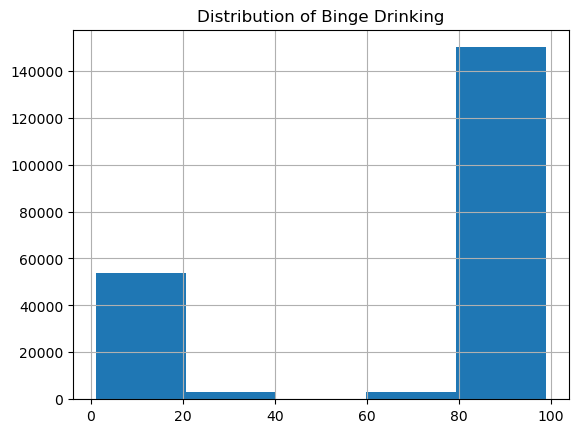

In [74]:
# Variable name:
df['DRNK3GE5'].hist(bins=5)
plt.title('Distribution of Binge Drinking')
plt.show()

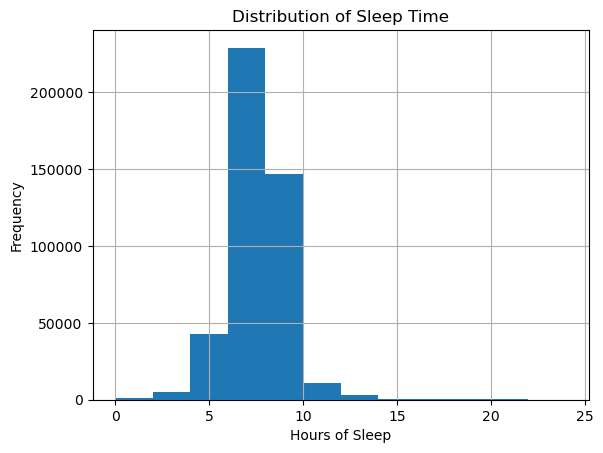

In [68]:
# Variable name:
# wanted to split the bins into 2 hr intervals to see the spread of data better
# implemented a range parameter
df['SLEPTIM1'].hist(bins=12, range=(0, 24))
plt.title('Distribution of Sleep Time')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()

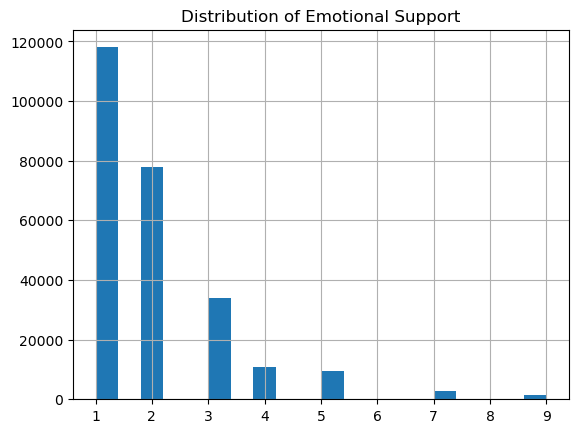

In [26]:
# Variable name:
df['EMTSUPRT'].hist(bins=20)
plt.title('Distribution of Emotional Support')
plt.show()

In [ ]:
# Detecting outliers:
sns.boxplot(df['column_name'])

In [ ]:
# Univariate analysis for categorical data
# examines each single var to describe & summarize its distribution, central tendency, and variability

/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_92282/2795297698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='INCOME3', palette='deep')


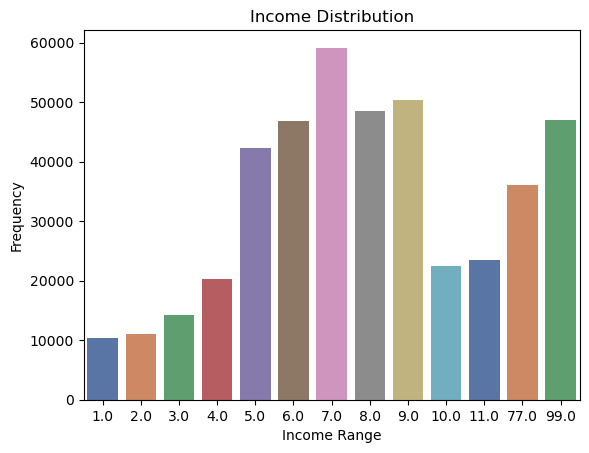

In [40]:
# Bar Plot
#sns.countplot(x='INCOME3', data=df)

sns.countplot(data=df, x='INCOME3', palette='deep')
plt.title('Income Distribution')
plt.xlabel('Income Range')
plt.ylabel('Frequency')
plt.show()


/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_92282/3513350114.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex_Label', palette='deep')


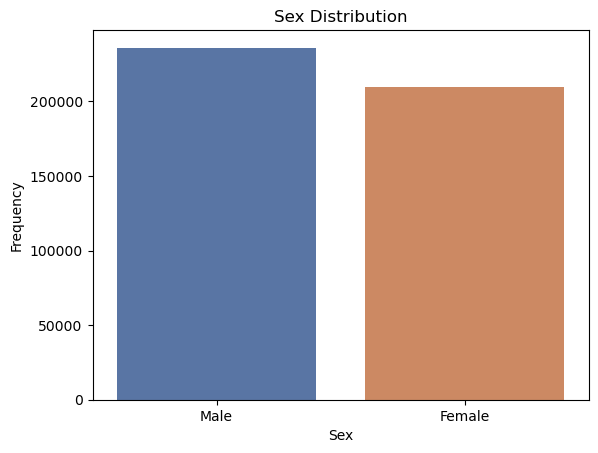

In [50]:
#Distribution of Sex

#needed to map the values to female = 0, male = 1
# Map the values to 'Male' and 'Female'
df['Sex_Label'] = df['SEXVAR'].map({1: 'Female', 2: 'Male'})

sns.countplot(data=df, x='Sex_Label', palette='deep')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

In [70]:
#